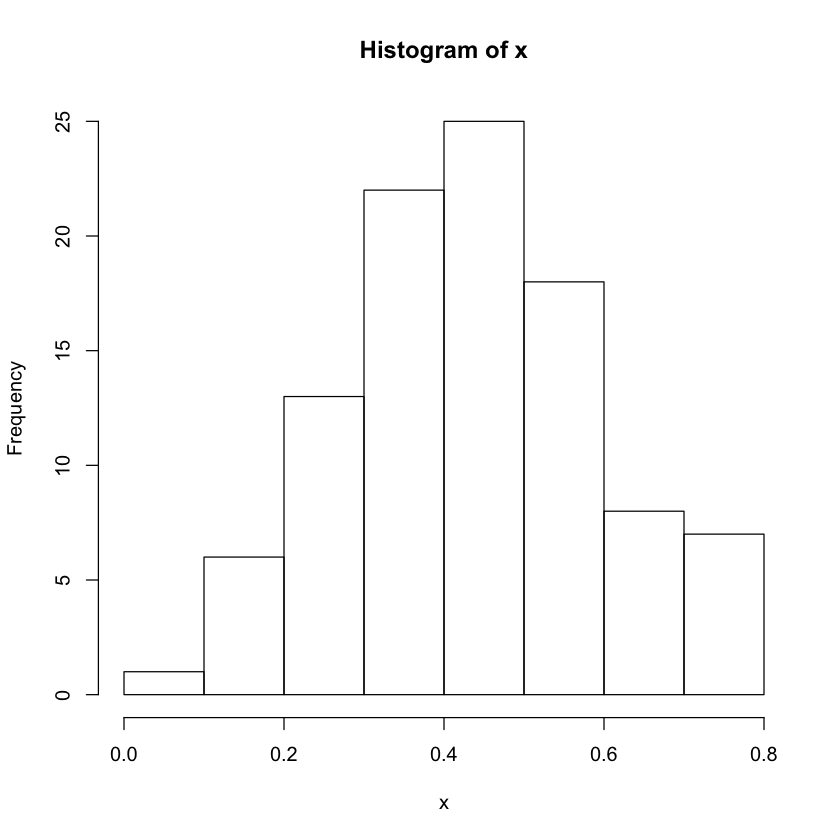

In [24]:
## Simulate some data for illustration

n <- 100
alpha <- 3
beta <- 4
x<- rbeta(n, alpha, beta)
hist(x)

In [25]:
## Write a function for the negative log-likelihood

nll <- function(par, x, verbose = FALSE){
  alpha <- par[1]; beta <- par[2] # unpack
  ll <- sum(dbeta(x, alpha, beta, log = TRUE))
  if (verbose) print(c(par, -ll))
  return(-ll)
}

In [26]:
## Numerically minimize it

start <- c(alpha = 1, beta = 1) # starting values
eps <- 1e-10 # small value for lower bounds

op <- optim(par = start, fn = nll,
            lower = rep(eps, 2),
            x = x, verbose = FALSE)
op # This is a list; extract elements using $
mle <- op$par

Warning message in optim(par = start, fn = nll, lower = rep(eps, 2), x = x, verbose = FALSE):
“bounds can only be used with method L-BFGS-B (or Brent)”

$par
   alpha     beta 
3.982351 5.299938 

$value
[1] -46.17375

$counts
function gradient 
      18       18 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

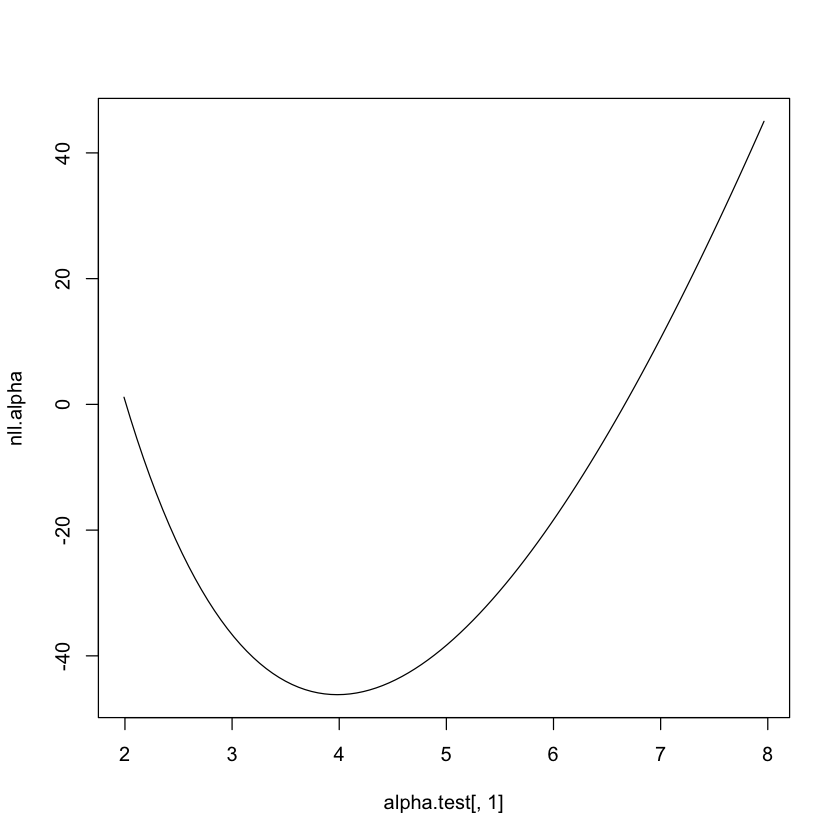

In [27]:
alpha.test <- cbind(seq(mle[1]/2, mle[1]*2, length = 100), mle[2])
nll.alpha <- apply(alpha.test, 1, nll, x = x, verbose = FALSE)
plot(alpha.test[,1], nll.alpha, type = "l")

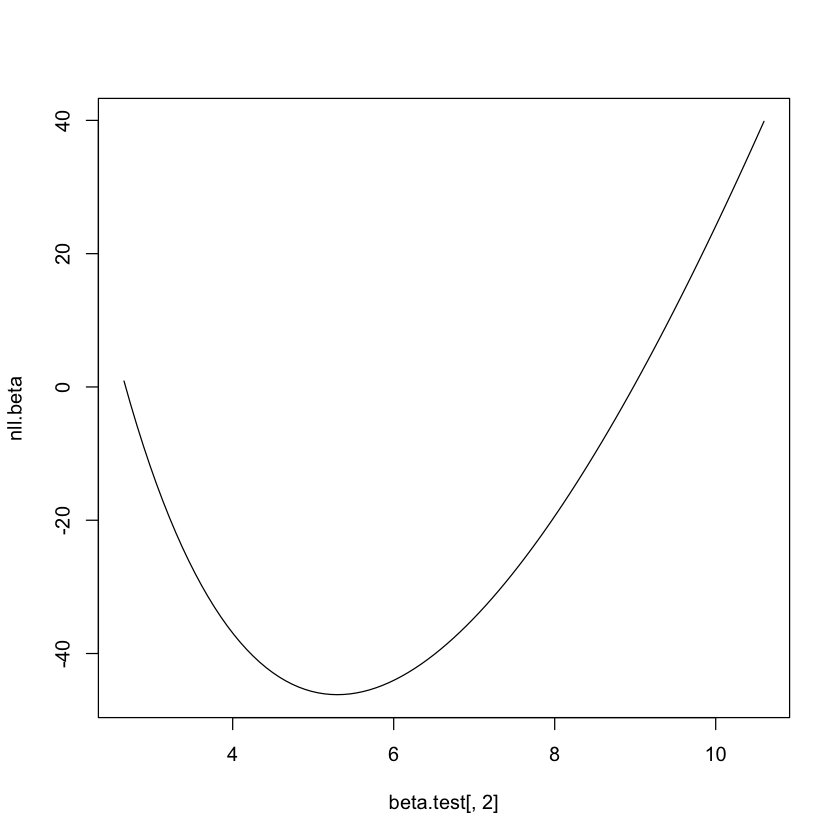

In [28]:
beta.test <- cbind(mle[1], seq(mle[2]/2, mle[2]*2, length = 100))
nll.beta <- apply(beta.test, 1, nll, x = x, verbose = FALSE)
plot(beta.test[,2], nll.beta, type = "l")

In [29]:
## Do it again, this time estimating the Hessian

op <- optim(par = start, fn = nll,
            lower = rep(eps, 2), hessian = TRUE,
            x = x, verbose = FALSE)

Warning message in optim(par = start, fn = nll, lower = rep(eps, 2), hessian = TRUE, :
“bounds can only be used with method L-BFGS-B (or Brent)”

In [30]:
mle <- op$par
J <- solve(op$hessian) # no negative - already working with negative ll
se.hat <- sqrt(diag(J))

lower <- mle - 2*se.hat
upper <- mle + 2*se.hat

In [31]:
lower

alpha     beta 
2.892032 3.826043

In [32]:
upper

alpha     beta 
5.072669 6.773834